In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_unweighted
import glob
from collections import defaultdict

In [2]:
truss_tax_file_list = list(glob.glob("/home/Users/mt102/shared/KOMB/kraken2-trusses/*/truss.kraken2_report.txt"))
all_tax_file_list = list(glob.glob("/home/Users/ns58/KOMB2/PRJNA878603-kraken2/*kraken2_report.txt"))

In [3]:
all_tax_file_list

['/home/Users/ns58/KOMB2/PRJNA878603-kraken2/SRR24907933.kraken2_report.txt',
 '/home/Users/ns58/KOMB2/PRJNA878603-kraken2/SRR24907938.kraken2_report.txt',
 '/home/Users/ns58/KOMB2/PRJNA878603-kraken2/SRR24907874.kraken2_report.txt',
 '/home/Users/ns58/KOMB2/PRJNA878603-kraken2/SRR24908026.kraken2_report.txt',
 '/home/Users/ns58/KOMB2/PRJNA878603-kraken2/SRR24907824.kraken2_report.txt',
 '/home/Users/ns58/KOMB2/PRJNA878603-kraken2/SRR24907883.kraken2_report.txt',
 '/home/Users/ns58/KOMB2/PRJNA878603-kraken2/SRR24907829.kraken2_report.txt',
 '/home/Users/ns58/KOMB2/PRJNA878603-kraken2/SRR24907922.kraken2_report.txt',
 '/home/Users/ns58/KOMB2/PRJNA878603-kraken2/SRR24907920.kraken2_report.txt',
 '/home/Users/ns58/KOMB2/PRJNA878603-kraken2/SRR24907878.kraken2_report.txt',
 '/home/Users/ns58/KOMB2/PRJNA878603-kraken2/SRR24908028.kraken2_report.txt',
 '/home/Users/ns58/KOMB2/PRJNA878603-kraken2/SRR24907911.kraken2_report.txt',
 '/home/Users/ns58/KOMB2/PRJNA878603-kraken2/SRR24907989.kraken2

In [4]:
truss_tax_profiles = {}
for file in all_tax_file_list:
    run_name = file.split('/')[-1].split(".")[0]
    truss_tax_profiles[run_name] = pd.read_csv(f"{file}", 
                                    sep='\t', header=None)

In [5]:
truss_tax_profiles["SRR24907994"]

,0,1,2,3,4,5
0,100.0,100,0,R,1,root
1,100.0,100,0,R1,131567,cellular organisms
2,100.0,100,0,D,2,Bacteria
3,87.0,87,0,D1,1783272,Terrabacteria group
4,83.0,83,3,P,1239,Bacillota
...,...,...,...,...,...,...
136,1.0,1,0,O,356,Hyphomicrobiales
137,1.0,1,0,F,2831100,Boseaceae
138,1.0,1,0,G,85413,Bosea
139,1.0,1,0,G1,2653178,unclassified Bosea (in: a-prot...


In [6]:
metadata = pd.read_csv("/home/Users/ns58/KOMB2/Data/PRJNA878603_SraRunTable.txt")
metadata_short = metadata[["Run", "gender", "RACE", "illness_duration", "study_ptorhc"]]
metadata_short = metadata_short.set_index("Run")
metadata_short

,gender,RACE,illness_duration,study_ptorhc
Run,,,,
SRR24907820,male,White,Control,Control
SRR24907822,female,White,Long,MECFS
SRR24907824,female,White,Long,MECFS
SRR24907826,female,White,Long,MECFS
SRR24907827,female,White,Control,Control
...,...,...,...,...
SRR24908035,female,White,Short,MECFS
SRR24908039,male,White,Short,MECFS
SRR24908045,female,White,Control,Control


In [7]:
control_truss_tax_profiles = {run: truss_tax_profiles[run] for run in truss_tax_profiles \
                              if metadata_short.at[run, "illness_duration"] == "Control"}
short_truss_tax_profiles   = {run: truss_tax_profiles[run] for run in truss_tax_profiles \
                              if metadata_short.at[run, "illness_duration"] == "Short"}
long_truss_tax_profiles    = {run: truss_tax_profiles[run] for run in truss_tax_profiles \
                              if metadata_short.at[run, "illness_duration"] == "Long"}

In [8]:
truss_control_entropy = [stats.entropy(control_truss_tax_profiles[run][control_truss_tax_profiles[run][3] == 'S'][0]) \
                         for run in control_truss_tax_profiles]
truss_short_entropy = [stats.entropy(short_truss_tax_profiles[run][short_truss_tax_profiles[run][3] == 'S'][0]) \
                       for run in short_truss_tax_profiles]
truss_long_entropy = [stats.entropy(long_truss_tax_profiles[run][long_truss_tax_profiles[run][3] == 'S'][0]) \
                      for run in long_truss_tax_profiles]

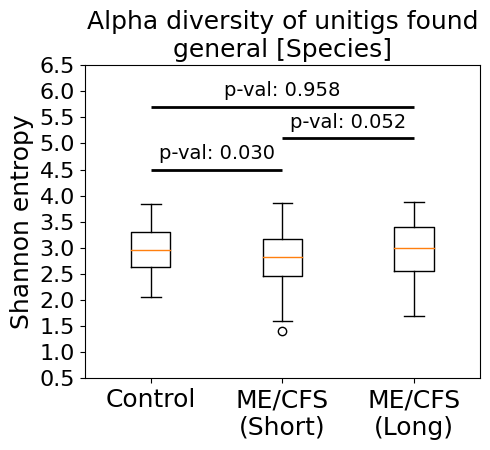

In [9]:
fig, axs = plt.subplots(1, 1, sharey=True, figsize=(5, 5))

axs.boxplot([truss_control_entropy, truss_short_entropy, truss_long_entropy])

w, p_val_control_short = stats.ttest_ind(truss_control_entropy, truss_short_entropy, equal_var=False)
w, p_val_control_long = stats.ttest_ind(truss_control_entropy, truss_long_entropy, equal_var=False)
w, p_val_short_long = stats.ttest_ind(truss_short_entropy, truss_long_entropy, equal_var=False)

axs.hlines([4.5, 5.1, 5.7], [1, 2, 1], [2, 3, 3], 
           lw=2, colors='k')
axs.text(1.5, 4.7, f"p-val: {p_val_control_short:.3f}",
         ha="center", fontsize=14)
axs.text(2.5, 5.3, f"p-val: {p_val_short_long:.3f}",
         ha="center", fontsize=14)
axs.text(2., 5.9, f"p-val: {p_val_control_long:.3f}",
         ha="center", fontsize=14)

axs.set_title("Alpha diversity of unitigs found\ngeneral [Species]", fontsize=18)

axs.set_ylabel("Shannon entropy", fontsize=18)
axs.set_yticks(np.arange(.5, 6.6, .5))
axs.set_yticklabels(np.arange(.5, 6.6, .5), fontsize=16)

axs.set_xticks([1, 2, 3])
axs.set_xticklabels(["Control", "ME/CFS\n(Short)", "ME/CFS\n(Long)"],
                    fontsize=18)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.savefig("PRJNA878603-MECFS-general-entropy-S-v-condition-dpi300.png", dpi=300)
plt.show()

In [10]:
control_sets = [set(control_truss_tax_profiles[run][control_truss_tax_profiles[run][3] == 'S'][4]) \
                for run in control_truss_tax_profiles]
short_sets   = [set(short_truss_tax_profiles[run][short_truss_tax_profiles[run][3] == 'S'][4]) \
                for run in short_truss_tax_profiles]
long_sets    = [set(long_truss_tax_profiles[run][long_truss_tax_profiles[run][3] == 'S'][4]) \
                for run in long_truss_tax_profiles]

control_pool_set = set()
short_pool_set   = set()
long_pool_set    = set()

for taxids in control_sets:
    control_pool_set |= taxids
    
for taxids in short_sets:
    short_pool_set |= taxids
    
for taxids in long_sets:
    long_pool_set |= taxids

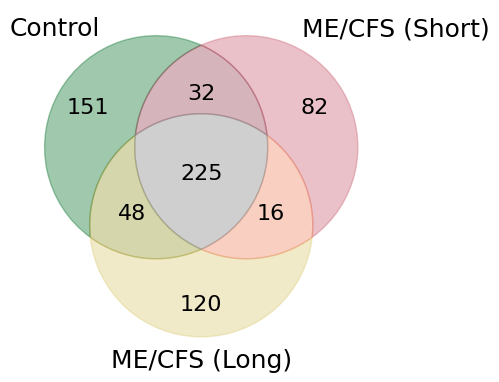

In [11]:
fig, ax = plt.subplots(figsize=(5, 5))
ids = ['100', '010', '001',
       '110', '101', '011', '111']

v = venn3_unweighted([control_pool_set, short_pool_set, long_pool_set],
                     set_labels=["Control", "ME/CFS (Short)", "ME/CFS (Long)"])

p = v.get_patch_by_id('100')
p.set_color('#117733')

p = v.get_patch_by_id('010')
p.set_color('#cc6677')

p = v.get_patch_by_id('001')
p.set_color('#ddcc77')

p = v.get_patch_by_id('110')
p.set_color('#994455')

p = v.get_patch_by_id('101')
p.set_color('#999933')

p = v.get_patch_by_id('011')
p.set_color('#ee8866')

p = v.get_patch_by_id('111')
p.set_color('#888888')

for i in ids:
    l = v.get_label_by_id(i)
    l.set_fontsize(16)

for l in v.set_labels:
    l.set_fontsize(18)
    
plt.tight_layout()
fig.savefig("PRJNA878603-MECFS-general-venn-S-v-condition-dpi300.png", dpi=300)
plt.show()

In [12]:
truss_control_entropy = [stats.entropy(control_truss_tax_profiles[run][control_truss_tax_profiles[run][3] == 'G'][0]) \
                         for run in control_truss_tax_profiles]
truss_short_entropy = [stats.entropy(short_truss_tax_profiles[run][short_truss_tax_profiles[run][3] == 'G'][0]) \
                       for run in short_truss_tax_profiles]
truss_long_entropy = [stats.entropy(long_truss_tax_profiles[run][long_truss_tax_profiles[run][3] == 'G'][0]) \
                      for run in long_truss_tax_profiles]

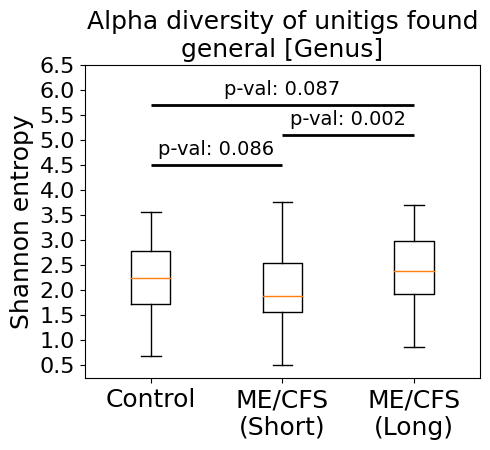

In [13]:
fig, axs = plt.subplots(1, 1, sharey=True, figsize=(5, 5))

axs.boxplot([truss_control_entropy, truss_short_entropy, truss_long_entropy])

w, p_val_control_short = stats.ttest_ind(truss_control_entropy, truss_short_entropy, equal_var=False)
w, p_val_control_long = stats.ttest_ind(truss_control_entropy, truss_long_entropy, equal_var=False)
w, p_val_short_long = stats.ttest_ind(truss_short_entropy, truss_long_entropy, equal_var=False)

axs.hlines([4.5, 5.1, 5.7], [1, 2, 1], [2, 3, 3], 
           lw=2, colors='k')
axs.text(1.5, 4.7, f"p-val: {p_val_control_short:.3f}",
         ha="center", fontsize=14)
axs.text(2.5, 5.3, f"p-val: {p_val_short_long:.3f}",
         ha="center", fontsize=14)
axs.text(2., 5.9, f"p-val: {p_val_control_long:.3f}",
         ha="center", fontsize=14)

axs.set_title("Alpha diversity of unitigs found\ngeneral [Genus]", fontsize=18)

axs.set_ylabel("Shannon entropy", fontsize=18)
axs.set_yticks(np.arange(.5, 6.6, .5))
axs.set_yticklabels(np.arange(.5, 6.6, .5), fontsize=16)

axs.set_xticks([1, 2, 3])
axs.set_xticklabels(["Control", "ME/CFS\n(Short)", "ME/CFS\n(Long)"],
                    fontsize=18)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.savefig("PRJNA878603-MECFS-general-entropy-G-v-condition-dpi300.png", dpi=300)
plt.show()

In [14]:
control_sets = [set(control_truss_tax_profiles[run][control_truss_tax_profiles[run][3] == 'G'][4]) \
                for run in control_truss_tax_profiles]
short_sets   = [set(short_truss_tax_profiles[run][short_truss_tax_profiles[run][3] == 'G'][4]) \
                for run in short_truss_tax_profiles]
long_sets    = [set(long_truss_tax_profiles[run][long_truss_tax_profiles[run][3] == 'G'][4]) \
                for run in long_truss_tax_profiles]

control_pool_set = set()
short_pool_set   = set()
long_pool_set    = set()

for taxids in control_sets:
    control_pool_set |= taxids
    
for taxids in short_sets:
    short_pool_set |= taxids
    
for taxids in long_sets:
    long_pool_set |= taxids

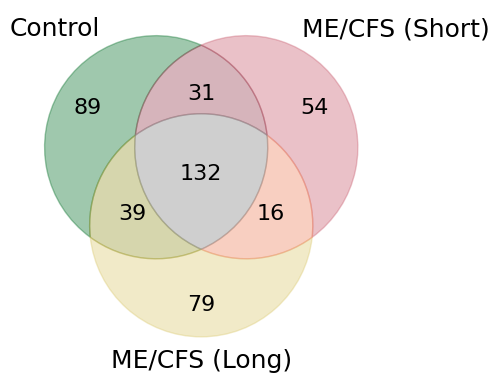

In [15]:
fig, ax = plt.subplots(figsize=(5, 5))
ids = ['100', '010', '001',
       '110', '101', '011', '111']

v = venn3_unweighted([control_pool_set, short_pool_set, long_pool_set],
                     set_labels=["Control", "ME/CFS (Short)", "ME/CFS (Long)"])

p = v.get_patch_by_id('100')
p.set_color('#117733')

p = v.get_patch_by_id('010')
p.set_color('#cc6677')

p = v.get_patch_by_id('001')
p.set_color('#ddcc77')

p = v.get_patch_by_id('110')
p.set_color('#994455')

p = v.get_patch_by_id('101')
p.set_color('#999933')

p = v.get_patch_by_id('011')
p.set_color('#ee8866')

p = v.get_patch_by_id('111')
p.set_color('#888888')

for i in ids:
    l = v.get_label_by_id(i)
    l.set_fontsize(16)

for l in v.set_labels:
    l.set_fontsize(18)
    
plt.tight_layout()
fig.savefig("PRJNA878603-MECFS-general-venn-G-v-condition-dpi300.png", dpi=300)
plt.show()